In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data= pd.read_csv("spam.csv",encoding="latin1")

In [3]:
data.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [4]:
data.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [6]:
data.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)
data.sample(5)

,v1,v2
490,ham,"Sorry man my account's dry or I would, if you ..."
923,ham,She went to attend another two rounds today..b...
2678,ham,Was playng 9 doors game and gt racing on phone...
3952,spam,Refused a loan? Secured or Unsecured? Can't ge...
2250,ham,I am getting threats from your sales executive...


In [7]:
data.rename(columns={'v1': 'Target' , 'v2': 'Text'}, inplace=True)
data.sample(5)

,Target,Text
4858,ham,"Hey, a guy I know is breathing down my neck to..."
3655,ham,Oh really?? Did you make it on air? What's you...
56,spam,Congrats! 1 year special cinema pass for 2 is ...
4266,ham,SORRY IM STIL FUCKED AFTER LAST NITE WENT TOBE...
4087,ham,He needs to stop going to bed and make with th...


In [8]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()

In [9]:
data['Target']= le.fit_transform(data['Target'])
data.sample(5)

,Target,Text
1475,0,Nice. Wait...should you be texting right now? ...
2526,0,Do u noe how 2 send files between 2 computers?
258,1,We tried to contact you re your reply to our o...
2291,0,Remind me how to get there and I shall do so
1124,0,Aiyar sorry lor forgot 2 tell u...


In [10]:
data.isnull().sum()

Target    0
Text      0
dtype: int64

In [11]:
data.duplicated().sum()

403

In [12]:
data= data.drop_duplicates(keep= 'first')
data.duplicated().sum()

0

In [13]:
data.shape

(5169, 2)

In [14]:
data['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

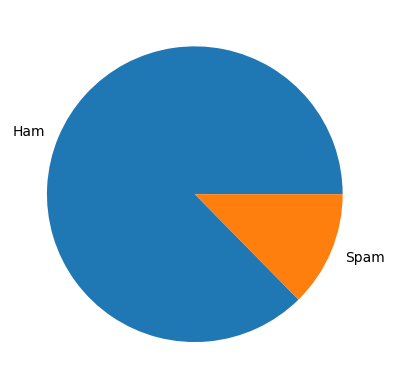

In [16]:
plt.pie(data['Target'].value_counts(),labels=['Ham','Spam'])
plt.show()

In [17]:
data['NumCharacters']=data['Text'].apply(len)

In [18]:
import nltk

In [19]:
data['NumWords']=data['Text'].apply(lambda x: len(nltk.word_tokenize(x)))

In [20]:
data.head()

,Target,Text,NumCharacters,NumWords
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [21]:
data['NumSentences']= data['Text'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [22]:
data[['NumCharacters','NumWords','NumSentences']].describe()

,NumCharacters,NumWords,NumSentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [23]:
#statistics for Ham
data[data['Target']==0][['NumCharacters','NumWords','NumSentences']].describe()

,NumCharacters,NumWords,NumSentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [24]:
#statistics for Spam
data[data['Target']==1][['NumCharacters','NumWords','NumSentences']].describe()

,NumCharacters,NumWords,NumSentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='NumWords', ylabel='Count'>

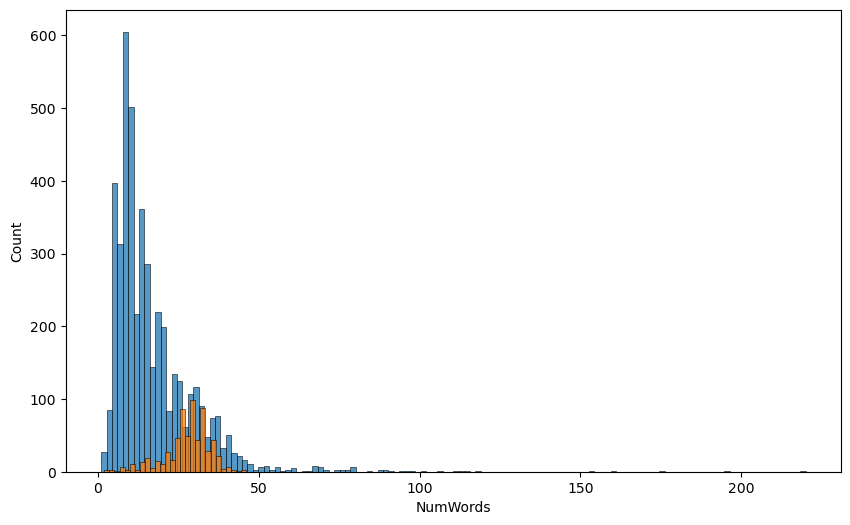

In [25]:
plt.figure(figsize=(10,6))
sns.histplot(data[data['Target']==0]['NumWords'])
sns.histplot(data[data['Target']==1]['NumWords'])

<Axes: xlabel='NumCharacters', ylabel='Count'>

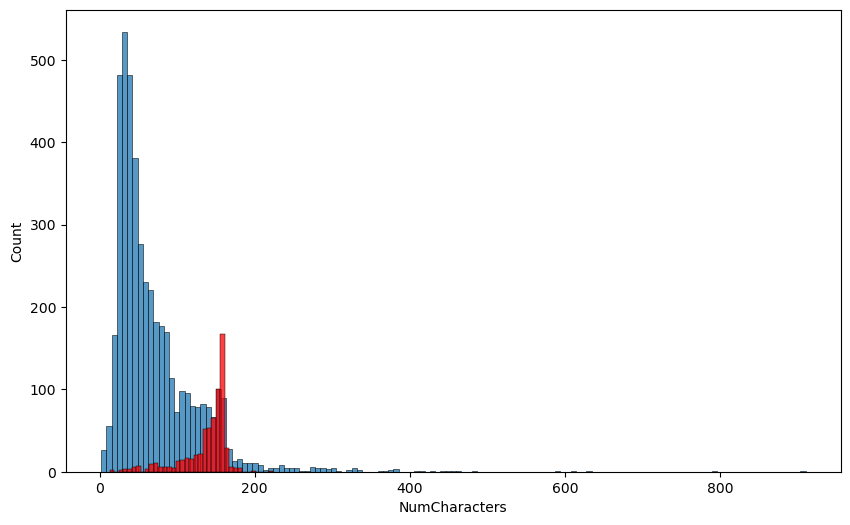

In [26]:
plt.figure(figsize=(10,6))
sns.histplot(data[data['Target']==0]['NumCharacters'])
sns.histplot(data[data['Target']==1]['NumCharacters'], color='red')

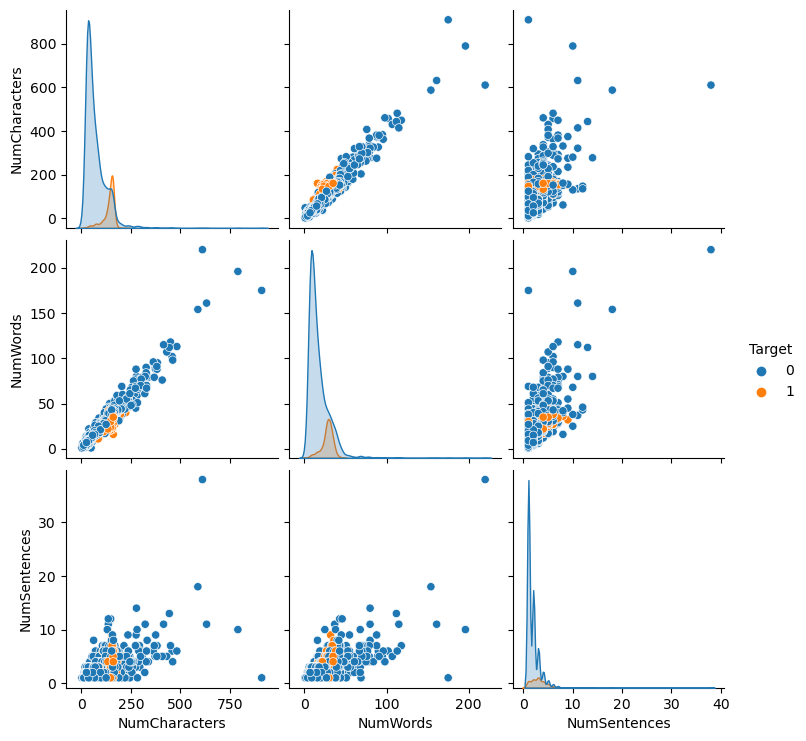

In [27]:
sns.pairplot(data,hue='Target')

In [28]:
import string
from nltk.stem.porter import PorterStemmer
import nltk
from nltk.corpus import stopwords

In [29]:
ps= PorterStemmer()

In [30]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)

    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    text=y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english')and i not in string.punctuation:
            y.append(i)
    text= y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [31]:
data['TransformedText']= data['Text'].apply(transform_text)

In [32]:
data.head()

,Target,Text,NumCharacters,NumWords,NumSentences,TransformedText
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [33]:
from wordcloud import WordCloud
wc= WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [34]:
spam_wc= wc.generate(data[data['Target']==1]['TransformedText'].str.cat(sep=" "))

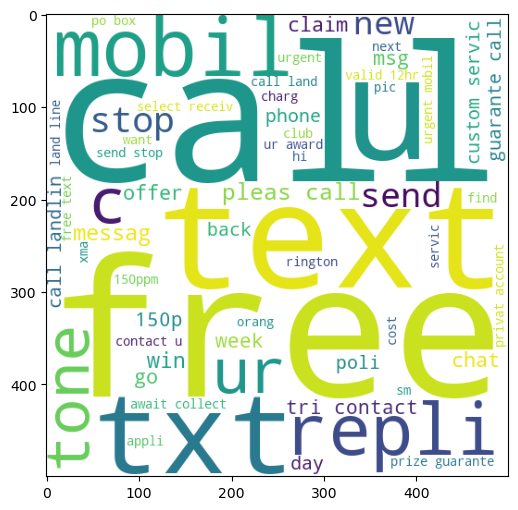

In [35]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

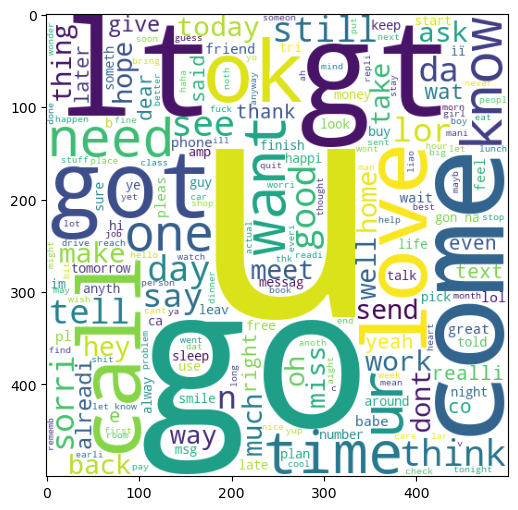

In [36]:
ham_wc= wc.generate(data[data['Target']==0]['TransformedText'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [37]:
data.head()

,Target,Text,NumCharacters,NumWords,NumSentences,TransformedText
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [38]:
spam_corpus=[ ] 
for msg in data[data['Target']==1]['TransformedText'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [39]:
len(spam_corpus)

9939

In [40]:
ham_corpus= []
for msg in data[data['Target']==0]['TransformedText'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [41]:
len(ham_corpus)

35404

In [42]:
data.head()

,Target,Text,NumCharacters,NumWords,NumSentences,TransformedText
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [43]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv= CountVectorizer()
tfidf= TfidfVectorizer(max_features=3000)

In [44]:
x= tfidf.fit_transform(data['TransformedText']).toarray()

In [45]:
x.shape

(5169, 3000)

In [46]:
y= data['Target'].values

In [47]:
from sklearn.model_selection import train_test_split

In [48]:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.2,random_state=2)

In [49]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [50]:
gnb= GaussianNB()
mnb= MultinomialNB()
bnb= BernoulliNB()

In [51]:
gnb.fit(x_train,y_train)
y_pred1= gnb.predict(x_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [52]:
mnb.fit(x_train,y_train)
y_pred2= mnb.predict(x_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [53]:
bnb.fit(x_train,y_train)
y_pred3= bnb.predict(x_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [54]:
!pip install xgboost

In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [56]:
svc= SVC(kernel= 'sigmoid', gamma=1.0)
knc= KNeighborsClassifier()
mnb= MultinomialNB()
dt= DecisionTreeClassifier(max_depth=5)
lr= LogisticRegression(solver='liblinear', penalty='l1')
rf= RandomForestClassifier(n_estimators= 50, random_state=2)
abc= AdaBoostClassifier(n_estimators= 50, random_state=2)
bc= BaggingClassifier(n_estimators= 50, random_state=2)
etc= ExtraTreesClassifier(n_estimators=50, random_state=2)
gdbc= GradientBoostingClassifier(n_estimators=50, random_state=2)
xgb= XGBClassifier(n_estimators=50, random_state=2)

In [57]:
clfs={'SVC':svc,
      'KN':knc,
      'MN':mnb,
      'DT':dt,
      'LR':lr,
      'RF':rf,
      'ABC':abc,
      'BC':bc,
      'ET':etc,
      'GBC':gdbc,
      'XB':xgb}

In [58]:
def train_classifier(clf,x_train,y_train,x_test,y_test):
    clf.fit(x_train,y_train)
    y_pred= clf.predict(x_test)
    accuracy= accuracy_score(y_test,y_pred)
    precision= precision_score(y_test,y_pred)
    return accuracy, precision

In [59]:
train_classifier(svc,x_train,y_train,x_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [60]:
accuracies= []
precisions= []
for name,clf in clfs.items():
    current_accuracy,current_precision= train_classifier(clf,x_train,y_train,x_test,y_test)

    print("for ",name)
    print("accuracy ",current_accuracy)
    print("precision ",current_precision)
    accuracies.append(current_accuracy)
    precisions.append(current_precision)
    

for  SVC
accuracy  0.9758220502901354
precision  0.9747899159663865
for  KN
accuracy  0.9052224371373307
precision  1.0
for  MN
accuracy  0.9709864603481625
precision  1.0
for  DT
accuracy  0.9313346228239845
precision  0.8252427184466019
for  LR
accuracy  0.9584139264990329
precision  0.9702970297029703
for  RF
accuracy  0.9758220502901354
precision  0.9829059829059829
for  ABC
accuracy  0.960348162475822
precision  0.9292035398230089
for  BC
accuracy  0.9584139264990329
precision  0.8682170542635659
for  ET
accuracy  0.9748549323017408
precision  0.9745762711864406
for  GBC
accuracy  0.9468085106382979
precision  0.9191919191919192
for  XB
accuracy  0.9671179883945842
precision  0.9262295081967213


In [61]:
perfomance_data= pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracies,'Precision':precisions,}).sort_values('Precision',ascending=False)

In [62]:
perfomance_data

,Algorithm,Accuracy,Precision
1,KN,0.905222,1.000000
2,MN,0.970986,1.000000
5,RF,0.975822,0.982906
0,SVC,0.975822,0.974790
8,ET,0.974855,0.974576
4,LR,0.958414,0.970297
6,ABC,0.960348,0.929204
10,XB,0.967118,0.926230
9,GBC,0.946809,0.919192
7,BC,0.958414,0.868217


In [63]:
perfomance_data1= pd.melt(perfomance_data, id_vars='Algorithm')
perfomance_data1

,Algorithm,variable,value
0,KN,Accuracy,0.905222
1,MN,Accuracy,0.970986
2,RF,Accuracy,0.975822
3,SVC,Accuracy,0.975822
4,ET,Accuracy,0.974855
5,LR,Accuracy,0.958414
6,ABC,Accuracy,0.960348
7,XB,Accuracy,0.967118
8,GBC,Accuracy,0.946809
9,BC,Accuracy,0.958414


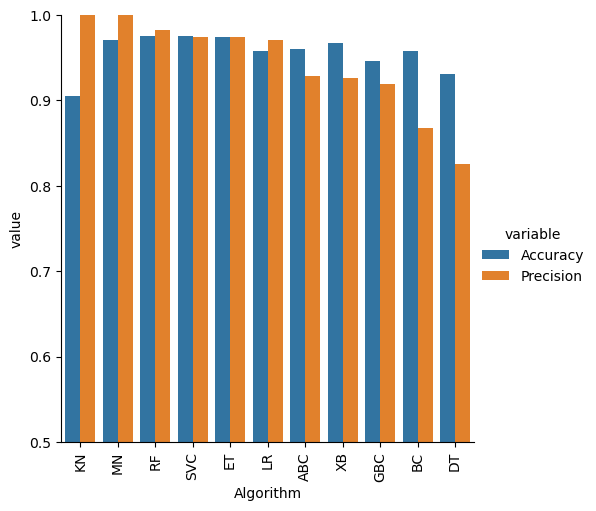

In [64]:
sns.catplot(x='Algorithm',y='value',hue='variable',data=perfomance_data1,kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [65]:
temp_data= pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracies,'precision_max_ft_3000':precisions}).sort_values('precision_max_ft_3000',ascending=False)

In [66]:
new_data= perfomance_data.merge(temp_data,on='Algorithm')

In [67]:
new_data_scaled= new_data.merge(temp_data,on='Algorithm')

In [68]:
temp_data= pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracies,'precision_num_chars':precisions}).sort_values('precision_num_chars',ascending=False)

In [69]:
new_data_scaled.merge(temp_data,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000_x,precision_max_ft_3000_x,Accuracy_max_ft_3000_y,precision_max_ft_3000_y,Accuracy_num_chars,precision_num_chars
0,KN,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,MN,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,SVC,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
4,ET,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
5,LR,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
6,ABC,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
7,XB,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
8,GBC,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BC,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [70]:
svc= SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb= MultinomialNB()
etc= ExtraTreesClassifier(n_estimators=50,random_state=2)

In [71]:
from sklearn.ensemble import VotingClassifier

In [72]:
voting= VotingClassifier(estimators=[('SVC',svc),('NB',mnb),('et',etc),],voting='soft')

In [73]:
voting.fit(x_train,y_train)

VotingClassifier(estimators=[('SVC',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('NB', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [74]:
y_pred= voting.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [75]:
estimators=[('svm',svc),('nb',mnb),('et',etc)]
final_estimator=RandomForestClassifier()

In [76]:
from sklearn.ensemble import StackingClassifier

In [77]:
clf= StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [78]:
clf.fit(x_train,y_train)
y_pred= clf.predict(x_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9796905222437138
Precision 0.9465648854961832
